#### Deep Learning Jump Start with Azure Databricks
##### Problem Statement:
###### Build and Train a Deep Convolution Network to Classify Images in the CIFAR10 dataset using Keras on Azure Databricks

##### The CIFAR-10 dataset:
The CIFAR-10 dataset consists of **60000 32x32** colour images in **10 classes**, with **6000** images per class. There are **50000** training images and **10000** test images. 
<br>
###### Image Classes Example
<img src="https://github.com/AbidGuroo/DeepLearningJumpstart/blob/master/media/CIFAR10.png?raw=true" alt="CIFAR10" width="500"/><br>
_CIFAR : Canadian Institute For Advanced Research_
<br>

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" alt="Keras" width="200"/>
##### **Keras** is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
* In this Technical Lab we will use Tensorflow as the backend for Keras

Keras is one of the leading frameworks to build deep learning models, It

1. Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
2. Supports both convolutional networks and recurrent networks, as well as combinations of the two.
3. Runs seamlessly on CPU and GPU.

#### Useful Shortcuts
##### 1. EDIT Cell --  < ENTER >
##### 2. Execute Cell -- < CTRL > + < ENTER >
##### 3. Execute Cell move to next -- < SHIFT > + < ENTER >
##### 4. Scroll Down - < SPACEBAR >
##### 5. Scroll UP - < SHIFT > + < SPACEBAR >

##### Step 1 - Library Import & general setup
* Keras
* Keras Preprocessing
* Keras Models
* Keras Layers
* Matplotlib

In [4]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

###### Validate GPU accessibility

In [6]:
# Test to Validate Tensorflow can access GPU
from tensorflow.python.client import device_lib
assert 'GPU' in str(device_lib.list_local_devices())

# Test to Validate Keras can access GPU
from keras import backend
assert len(backend.tensorflow_backend._get_available_gpus()) > 0

###### Define Helper functions for plots and image display

In [8]:
def plotmetrics(history):
  width = 10
  height = 5
  ## Clear plot if repeated call
  plt.clf()
  plt.figure(figsize=(width, height))
  # Plot training & validation accuracy values
  plt.title('Model Metrics : Non Augmented Data')
  plt.subplot(1, 2, 1)
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  # Plot training & validation loss values
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  pltoutput = plt.show()
  return pltoutput

In [9]:
def plotImages( images_arr, n_images=8):
    fig, axes = plt.subplots(n_images, n_images, figsize=(9,9))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
    
        ax.imshow( img, cmap="Greys_r")
        ax.set_xticks(())
        ax.set_yticks(())
    plot = plt.tight_layout()
    return plot

##### Step 2 - Load and process CIFAR 10 Dataset

In [11]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples

##### Display Training Image Samples (#100)
Here is a sample of the actual images from the Training set

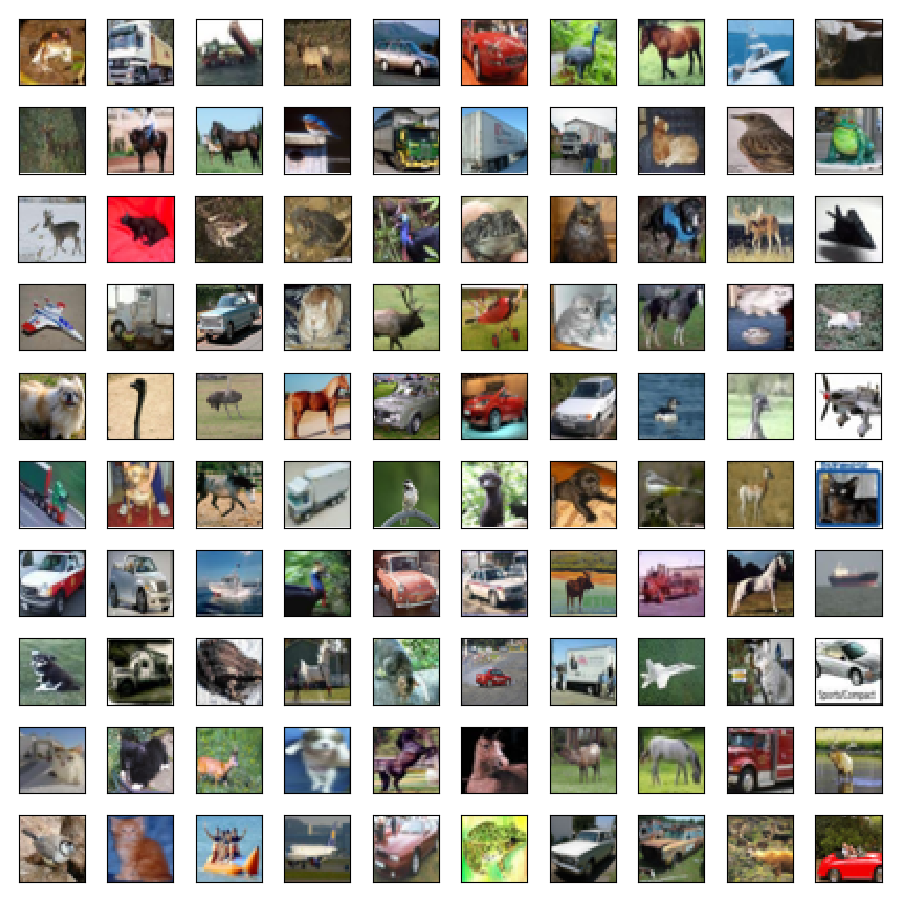

In [13]:
display(plotImages(x_train,n_images=10))

##### Initial Model Training ParametersParameter Setup

1. **Batch Size** - Defines the number of samples that will be propagated through the network.<br>
    We will use a batch size of **32** in this Lab
    
2. **Number of Classes**<br>
    CIFAR10 Dataset has **10** target classes
    
3. **Epochs** - Number times that the learning algorithm will run through the entire training dataset.<br>
    We will use **25 Epochs** in this lab to reduce the overall training time

In [15]:
batch_size = 32
num_classes = 10
epochs = 30

##### Preprocessing Steps
1. Convert class vectors to binary class matrices
2. Cast PIXEL Values to FLOAT
3. Normalize Pixel RGB Values to (0:1)

In [17]:
#1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
#2
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#3
x_train /= 255
x_test /= 255

##### Step 3 - Define Convolution Network

In [19]:
def initializeModel():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding='same',
                   input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  return model


In [20]:
model = initializeModel()

In [21]:
## Print Model Summary
model.summary()

_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
conv2d_9 (Conv2D) (None, 32, 32, 32) 896 
_________________________________________________________________
activation_13 (Activation) (None, 32, 32, 32) 0 
_________________________________________________________________
conv2d_10 (Conv2D) (None, 30, 30, 32) 9248 
_________________________________________________________________
activation_14 (Activation) (None, 30, 30, 32) 0 
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32) 0 
_________________________________________________________________
dropout_7 (Dropout) (None, 15, 15, 32) 0 
_________________________________________________________________
conv2d_11 (Conv2D) (None, 15, 15, 64) 18496 
_________________________________________________________________
activation_15 (Activation) (None, 15, 15, 64) 0 
_________________________________________________________________
conv2d_12 (Conv2D) (None, 13, 13, 64) 36928 
_________________________________________________________________
activation_16 (Activation) (None, 13, 13, 64) 0 
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64) 0 
_________________________________________________________________
dropout_8 (Dropout) (None, 6, 6, 64) 0 
_________________________________________________________________
flatten_3 (Flatten) (None, 2304) 0 
_________________________________________________________________
dense_5 (Dense) (None, 512) 1180160 
_________________________________________________________________
activation_17 (Activation) (None, 512) 0 
_________________________________________________________________
dropout_9 (Dropout) (None, 512) 0 
_________________________________________________________________
dense_6 (Dense) (None, 10) 5130 
_________________________________________________________________
activation_18 (Activation) (None, 10) 0 
=================================================================
Total params: 1,250,858
Trainable params: 1,250,858
Non-trainable params: 0
_________________________________________________________________

##### Step 4 - Define Optimizers and Compile the model

**Optimization algorithms** are used to minimize (or maximize) an Objective function (also called Error function) E(x) which is mathematical function dependent on the Model’s internal learnable parameters that are used in computing the target values(Y) from the set of predictors(X) used by the machine learning model. In neural networks the Weights(W) and the Bias(b) values are the learnable parameters which are used in computing the output values and are learned and updated in the direction of best solution i.e minimizing the Loss by the network’s training process.

Below are som of the most used optimizers available in Keras:
1. Stochastic Gradient Descent (SGD)
2. Root Mean Square Propagation (RMSProp)
3. Adaptive Gradient (ADAGrad)
4. Adaptive Moment Estimation (ADAM)
  
**Hyper Parameters**
  Two hyper parameters used by most optimizers are:
  1. Learning Rate - Learning rate (lr) controls the magnitude of adjustment of the weights of the neural network with respect the loss gradient.
  2. Decay - Weight decay is a regularization term that causes weights to exponentially decay to zero and hence penalizes big weights.

In [23]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

##### Step 5 - Model Training : without Data Augmentation (Takes 5-8 Mins)

In [25]:
from keras.callbacks import History 
history_noAug = History()
print('Not using data augmentation.')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
         callbacks=[history_noAug],
         verbose=1)

Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/30

 32/50000 [..............................] - ETA: 11:01 - loss: 2.3946 - acc: 0.0312
 192/50000 [..............................] - ETA: 2:05 - loss: 2.3481 - acc: 0.0729 
 320/50000 [..............................] - ETA: 1:23 - loss: 2.3214 - acc: 0.0875
 480/50000 [..............................] - ETA: 1:01 - loss: 2.3169 - acc: 0.0958
 640/50000 [..............................] - ETA: 50s - loss: 2.3109 - acc: 0.1062 
 800/50000 [..............................] - ETA: 43s - loss: 2.3139 - acc: 0.1025
 960/50000 [..............................] - ETA: 38s - loss: 2.3099 - acc: 0.1104
 1120/50000 [..............................] - ETA: 35s - loss: 2.3122 - acc: 0.1071
 1280/50000 [..............................] - ETA: 32s - loss: 2.3110 - acc: 0.1078
 1440/50000 [..............................] - ETA: 30s - loss: 2.3074 - acc: 0.1090
 1632/50000 [..............................] - ETA: 28s - loss: 2.3047 - acc: 0.1115
 1824/50000 [>.............................] - ETA: 27s - loss: 2.3024 - acc: 0.1129
 2016/50000 [>.............................] - ETA: 26s - loss: 2.3018 - acc: 0.1136
 2208/50000 [>.............................] - ETA: 24s - loss: 2.2989 - acc: 0.1187
 2400/50000 [>.............................] - ETA: 23s - loss: 2.2983 - acc: 0.1200
 2592/50000 [>.............................] - ETA: 23s - loss: 2.2962 - acc: 0.1204
 2784/50000 [>.............................] - ETA: 22s - loss: 2.2945 - acc: 0.1214
 2976/50000 [>.............................] - ETA: 21s - loss: 2.2935 - acc: 0.1213
 3168/50000 [>.............................] - ETA: 21s - loss: 2.2916 - acc: 0.1244
 3360/50000 [=>............................] - ETA: 20s - loss: 2.2901 - acc: 0.1247
 3552/50000 [=>............................] - ETA: 20s - loss: 2.2878 - acc: 0.1242
 3744/50000 [=>............................] - ETA: 19s - loss: 2.2848 - acc: 0.1253
 3936/50000 [=>............................] - ETA: 19s - loss: 2.2838 - acc: 0.1273
 4128/50000 [=>............................] - ETA: 19s - loss: 2.2815 - acc: 0.1303
 4320/50000 [=>............................] - ETA: 18s - loss: 2.2789 - acc: 0.1350
 4512/50000 [=>............................] - ETA: 18s - loss: 2.2765 - acc: 0.1376
 4704/50000 [=>............................] - ETA: 18s - loss: 2.2739 - acc: 0.1414
 4896/50000 [=>............................] - ETA: 17s - loss: 2.2719 - acc: 0.1420
 5088/50000 [==>...........................] - ETA: 17s - loss: 2.2685 - acc: 0.1437
 5280/50000 [==>...........................] - ETA: 17s - loss: 2.2635 - acc: 0.1460
 5472/50000 [==>...........................] - ETA: 17s - loss: 2.2604 - acc: 0.1466
 5664/50000 [==>...........................] - ETA: 16s - loss: 2.2557 - acc: 0.1497
 5856/50000 [==>...........................] - ETA: 16s - loss: 2.2520 - acc: 0.1520
 6048/50000 [==>...........................] - ETA: 16s - loss: 2.2484 - acc: 0.1528
 6240/50000 [==>...........................] - ETA: 16s - loss: 2.2433 - acc: 0.1554
 6432/50000 [==>...........................] - ETA: 16s - loss: 2.2387 - acc: 0.1567
 6624/50000 [==>...........................] - ETA: 15s - loss: 2.2353 - acc: 0.1579
 6816/50000 [===>..........................] - ETA: 15s - loss: 2.2292 - acc: 0.1620
 7008/50000 [===>..........................] - ETA: 15s - loss: 2.2257 - acc: 0.1641
 7200/50000 [===>..........................] - ETA: 15s - loss: 2.2209 - acc: 0.1664
 7392/50000 [===>..........................] - ETA: 15s - loss: 2.2180 - acc: 0.1673
 7584/50000 [===>..........................] - ETA: 15s - loss: 2.2138 - acc: 0.1693
 7776/50000 [===>..........................] - ETA: 15s - loss: 2.2100 - acc: 0.1708
 7968/50000 [===>..........................] - ETA: 14s - loss: 2.2063 - acc: 0.1714
 8160/50000 [===>..........................] - ETA: 14s - loss: 2.2030 - acc: 0.1727
 8352/50000 [====>.........................] - ETA: 14s - loss: 2.1986 - acc: 0.1733


###### Evaluate the model (to Get final test accuracy and loss)

In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

Test accuracy: 0.7679
Test loss: 0.7020724067687988

##### Visualize Model metrics

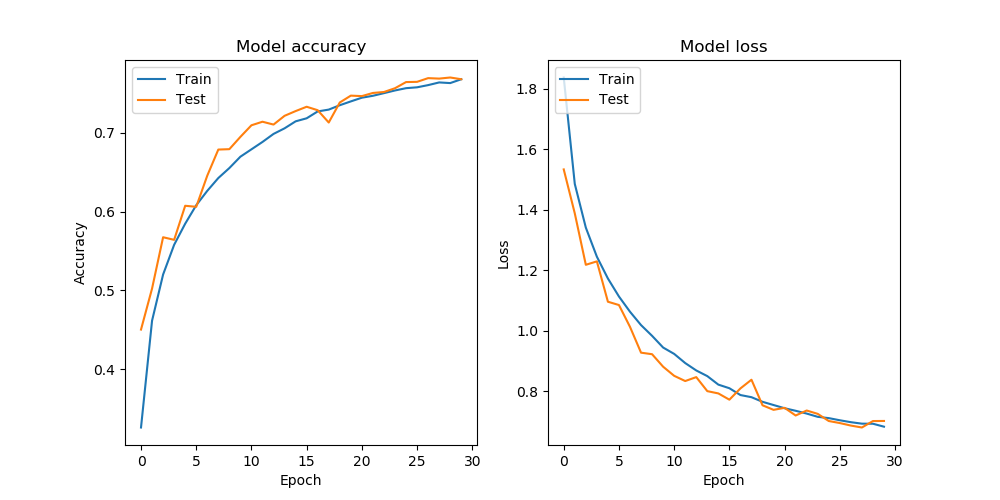

In [29]:
pltoutput = plotmetrics(history_noAug)
display(pltoutput)

Save Trained Model (without Data Augmentation) to DBFS as HDF5 file

In [31]:
## Create Output Model Directory
dbutils.fs.mkdirs('/CIFAR10/models/')

Out[59]: True

In [32]:
modelpath = '/dbfs/CIFAR10/models/CIFAR10_30epoch_withoutDA.h5'
model.save(modelpath)

##### Step 6 - Model Training with Data Augmentation (Takes 5-10 Minutes)

In [34]:
model = initializeModel()
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [35]:
from keras.callbacks import History 
history_Aug = History()
print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                     callbacks=[history_Aug],
                   verbose =1)

Using real-time data augmentation.
Epoch 1/30

 1/1562 [..............................] - ETA: 13:16 - loss: 2.3567 - acc: 0.0625
 6/1562 [..............................] - ETA: 2:28 - loss: 2.3129 - acc: 0.1354 
 11/1562 [..............................] - ETA: 1:29 - loss: 2.3083 - acc: 0.1250
 16/1562 [..............................] - ETA: 1:07 - loss: 2.3018 - acc: 0.1406
 21/1562 [..............................] - ETA: 55s - loss: 2.3026 - acc: 0.1384 
 26/1562 [..............................] - ETA: 47s - loss: 2.2998 - acc: 0.1382
 31/1562 [..............................] - ETA: 42s - loss: 2.2977 - acc: 0.1371
 36/1562 [..............................] - ETA: 39s - loss: 2.2965 - acc: 0.1389
 41/1562 [..............................] - ETA: 36s - loss: 2.2944 - acc: 0.1372
 46/1562 [..............................] - ETA: 34s - loss: 2.2953 - acc: 0.1365
 51/1562 [..............................] - ETA: 32s - loss: 2.2957 - acc: 0.1348
 56/1562 [>.............................] - ETA: 30s - loss: 2.2936 - acc: 0.1367
 61/1562 [>.............................] - ETA: 29s - loss: 2.2926 - acc: 0.1352
 66/1562 [>.............................] - ETA: 28s - loss: 2.2917 - acc: 0.1316
 72/1562 [>.............................] - ETA: 27s - loss: 2.2894 - acc: 0.1324
 77/1562 [>.............................] - ETA: 26s - loss: 2.2872 - acc: 0.1331
 83/1562 [>.............................] - ETA: 25s - loss: 2.2854 - acc: 0.1329
 89/1562 [>.............................] - ETA: 24s - loss: 2.2812 - acc: 0.1352
 95/1562 [>.............................] - ETA: 23s - loss: 2.2777 - acc: 0.1398
 100/1562 [>.............................] - ETA: 23s - loss: 2.2744 - acc: 0.1441
 105/1562 [=>............................] - ETA: 22s - loss: 2.2707 - acc: 0.1458
 110/1562 [=>............................] - ETA: 22s - loss: 2.2666 - acc: 0.1469
 115/1562 [=>............................] - ETA: 22s - loss: 2.2625 - acc: 0.1497
 120/1562 [=>............................] - ETA: 21s - loss: 2.2591 - acc: 0.1521
 125/1562 [=>............................] - ETA: 21s - loss: 2.2558 - acc: 0.1537
 130/1562 [=>............................] - ETA: 21s - loss: 2.2529 - acc: 0.1550
 135/1562 [=>............................] - ETA: 21s - loss: 2.2481 - acc: 0.1562
 140/1562 [=>............................] - ETA: 20s - loss: 2.2464 - acc: 0.1569
 145/1562 [=>............................] - ETA: 20s - loss: 2.2435 - acc: 0.1575
 150/1562 [=>............................] - ETA: 20s - loss: 2.2379 - acc: 0.1592
 155/1562 [=>............................] - ETA: 20s - loss: 2.2337 - acc: 0.1609
 160/1562 [==>...........................] - ETA: 20s - loss: 2.2280 - acc: 0.1631
 165/1562 [==>...........................] - ETA: 19s - loss: 2.2226 - acc: 0.1638
 170/1562 [==>...........................] - ETA: 19s - loss: 2.2177 - acc: 0.1658
 175/1562 [==>...........................] - ETA: 19s - loss: 2.2134 - acc: 0.1680
 180/1562 [==>...........................] - ETA: 19s - loss: 2.2090 - acc: 0.1698
 185/1562 [==>...........................] - ETA: 19s - loss: 2.2053 - acc: 0.1713
 190/1562 [==>...........................] - ETA: 19s - loss: 2.2010 - acc: 0.1734
 195/1562 [==>...........................] - ETA: 18s - loss: 2.1957 - acc: 0.1753
 200/1562 [==>...........................] - ETA: 18s - loss: 2.1938 - acc: 0.1761
 205/1562 [==>...........................] - ETA: 18s - loss: 2.1909 - acc: 0.1768
 210/1562 [===>..........................] - ETA: 18s - loss: 2.1861 - acc: 0.1790
 215/1562 [===>..........................] - ETA: 18s - loss: 2.1819 - acc: 0.1789
 220/1562 [===>..........................] - ETA: 18s - loss: 2.1795 - acc: 0.1800
 224/1562 [===>..........................] - ETA: 18s - loss: 2.1767 - acc: 0.1809
 229/1562 [===>..........................] - ETA: 18s - loss: 2.1738 - acc: 0.1833
 234/1562 [===>..........................] - ETA: 17s - loss: 2.1700 - acc: 0.1852
 239/1562 [===>..........................] - ETA: 17s - loss: 2.16

###### Evaluate the model (to Get final test accuracy and loss)

In [37]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

Test accuracy: 0.7608
Test loss: 0.6976699527740479

##### Visualize Model metrics

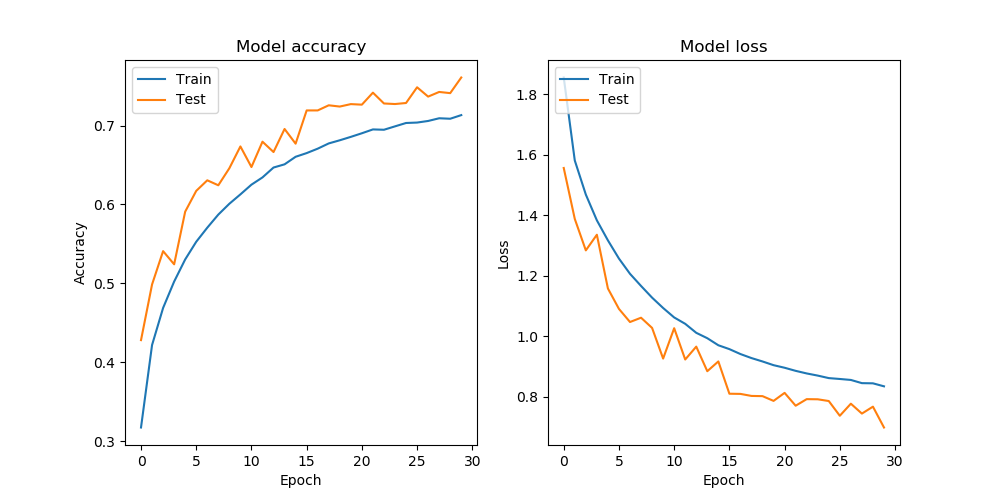

In [39]:
pltoutput = plotmetrics(history_Aug)
display(pltoutput)

Save Trained Model (with Data Augmentation) to DBFS as HDF5 file

In [41]:
modelpath = '/dbfs/CIFAR10/models/CIFAR10_30epoch_withDA.h5'
model.save(modelpath)

Validate existence of output model files

In [43]:
dbutils.fs.ls('/CIFAR10/models/')

Out[77]: 
[FileInfo(path='dbfs:/CIFAR10/models/CIFAR10_30epoch_withDA.h5', name='CIFAR10_30epoch_withDA.h5', size=10054080),
 FileInfo(path='dbfs:/CIFAR10/models/CIFAR10_30epoch_withoutDA.h5', name='CIFAR10_30epoch_withoutDA.h5', size=10054080)]

#### Summary
The process of building Deep Learning models on Azure Databricks can be summarized as :

1. **Setup/Configuration:**<br>
  * Cluster creation and configuration.
  * Library installation (optional)<br>
2. **Data Processing:**<br>
  * Data Ingestion
  * Data Preparation/Feature Engineering<br>
  * Data Augmentation<br>
3. **Modeling:**<br>
  * Network definition
  * Hyper Parameter definition/Tuning
  * Model Training
  * Model Evaluation
4. **Deployment**
  * Azure Machine Learning Service
  * IOT Edge
  * Azure Container Service<br>
  <img src="https://github.com/AbidGuroo/DeepLearningJumpstart/blob/master/media/processflow.png?raw=true" alt="Process Flow" width="1000"/>
  ###### Deep Learning on Azure Databricks – Process Flow